IMPORTAR LIBRERIAS Y DATASETS

In [64]:
from sklearn.preprocessing import LabelEncoder
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import stdev
from pprint import pprint
import warnings
warnings.filterwarnings("ignore")
sns.set_context("notebook")

In [65]:
# Para leer el archivo se debe poner toda la ruta dónde esta el archivo, o dejarlo en la misma carpeta de este archivo
employee_df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [66]:
# algunas funciones fundamentales para entender los datos
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [67]:
employee_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [68]:
cat_cols=employee_df.select_dtypes(include=object).columns.tolist()
cat_cols

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

## Análisis descriptivo
Vamos a revisar algunos gráficos de nos pueden ser útil para ver que puede explicar que los empleados salgan

In [123]:
employee_df['Attrition'].value_counts(normalize=True)

0    0.838776
1    0.161224
Name: Attrition, dtype: float64

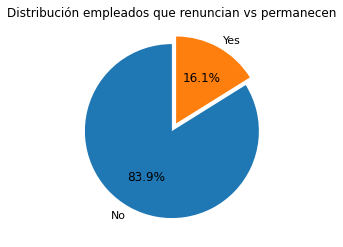

In [129]:
renuncia= employee_df['Attrition'].value_counts(normalize=True)
plt.pie(renuncia, explode=[0, 0.1], labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90)
plt.title('Distribución empleados que renuncian vs permanecen');

In [70]:
employee_df.groupby(['Gender'])['Attrition'].value_counts(normalize=True)

Gender  Attrition
Female  No           0.852041
        Yes          0.147959
Male    No           0.829932
        Yes          0.170068
Name: Attrition, dtype: float64

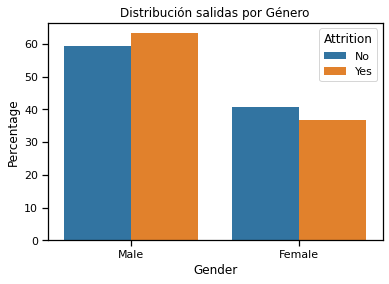

In [71]:
df = (employee_df.groupby(['Attrition'])['Gender']
    .value_counts(normalize=True)
    .rename('Percentage')
    .mul(100)
    .reset_index())

sns.barplot(x="Gender",y='Percentage',hue='Attrition', data=df)
plt.title('Distribución salidas por Género');

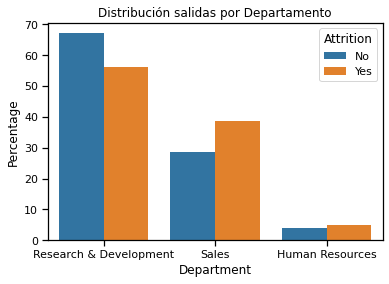

In [72]:
df = (employee_df.groupby(['Attrition'])['Department']
    .value_counts(normalize=True)
    .rename('Percentage')
    .mul(100)
    .reset_index())
 
sns.barplot(x="Department",y='Percentage',hue='Attrition', data=df)
plt.title('Distribución salidas por Departamento');

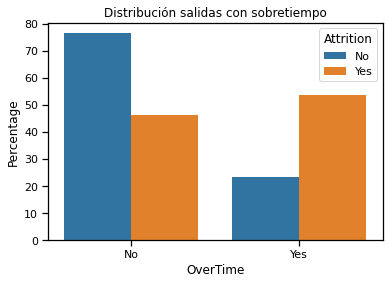

In [73]:
df = (employee_df.groupby(['Attrition'])['OverTime']
    .value_counts(normalize=True)
    .rename('Percentage')
    .mul(100)
    .reset_index())
 
sns.barplot(x='OverTime',y='Percentage',hue='Attrition', data=df)
plt.title('Distribución salidas con sobretiempo');

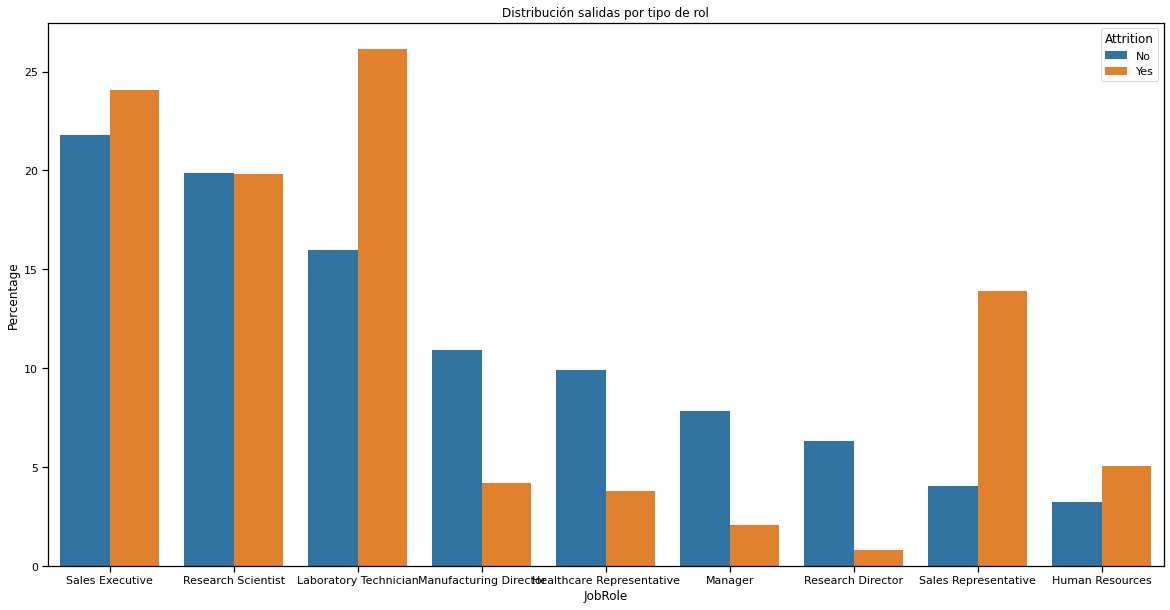

In [74]:
df = (employee_df.groupby(['Attrition'])['JobRole']
    .value_counts(normalize=True)
    .rename('Percentage')
    .mul(100)
    .reset_index())

plt.figure(figsize=[20,10])
sns.barplot(x='JobRole',y='Percentage',hue='Attrition', data=df)
plt.title('Distribución salidas por tipo de rol');

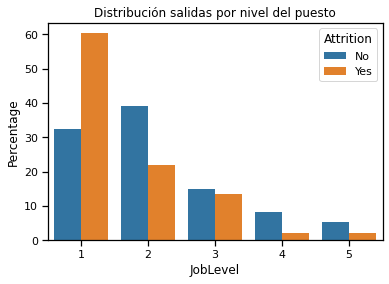

In [75]:
df = (employee_df.groupby(['Attrition'])['JobLevel']
    .value_counts(normalize=True)
    .rename('Percentage')
    .mul(100)
    .reset_index())
 
sns.barplot(x='JobLevel',y='Percentage',hue='Attrition', data=df)
plt.title('Distribución salidas por nivel del puesto');

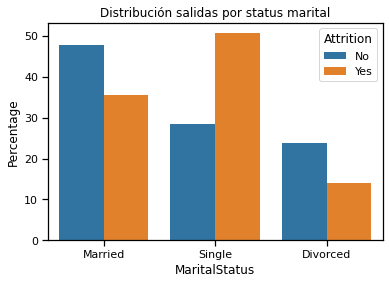

In [76]:
df = (employee_df.groupby(['Attrition'])['MaritalStatus']
    .value_counts(normalize=True)
    .rename('Percentage')
    .mul(100)
    .reset_index())
 
sns.barplot(x='MaritalStatus',y='Percentage',hue='Attrition', data=df)
plt.title('Distribución salidas por status marital');

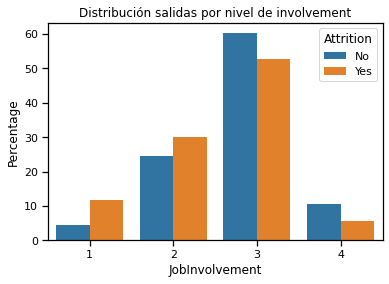

In [77]:
df = (employee_df.groupby(['Attrition'])['JobInvolvement']
    .value_counts(normalize=True)
    .rename('Percentage')
    .mul(100)
    .reset_index())
 
sns.barplot(x='JobInvolvement',y='Percentage',hue='Attrition', data=df)
plt.title('Distribución salidas por nivel de involvement');

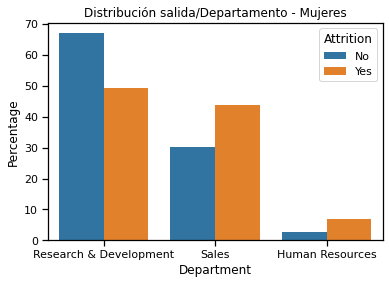

In [78]:
df = (employee_df[employee_df['Gender']=='Female'].groupby(['Attrition'])['Department']
    .value_counts(normalize=True)
    .rename('Percentage')
    .mul(100)
    .reset_index())
 
sns.barplot(x='Department',y='Percentage',hue='Attrition', data=df)
plt.title('Distribución salida/Departamento - Mujeres');

In [79]:
# con la función de label encoder es posible entregar valores numericos a cada categoría de variables categoricas.
#Veamos 3 ejemplos  
label_encoder = LabelEncoder()
employee_df['Attrition']=label_encoder.fit_transform(employee_df['Attrition'])
employee_df['OverTime']=label_encoder.fit_transform(employee_df['OverTime'])
employee_df['Over18']=label_encoder.fit_transform(employee_df['Over18'])

In [80]:
# veamos como queda
employee_df[['Attrition','OverTime','Over18']].head(5)

,Attrition,OverTime,Over18
0,1,1,0
1,0,0,0
2,1,1,0
3,0,1,0
4,0,0,0


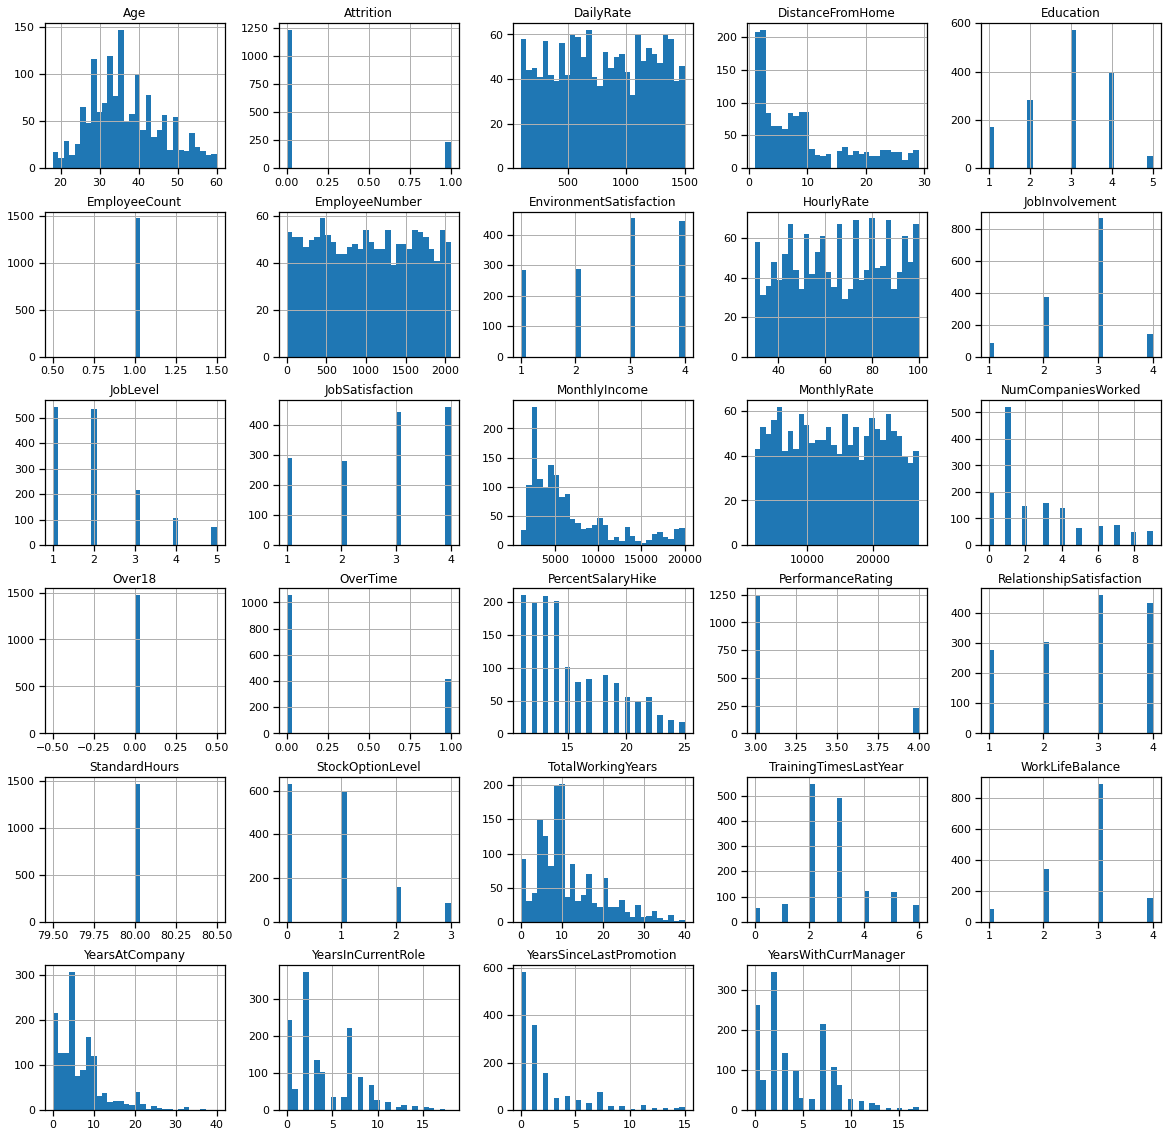

In [81]:
#Veamos las distribuciones de las variables
employee_df.hist(bins=30,figsize=(20,20));

# Algunas distribuciones son tipo normal (Age), otras son del tipo heavy tail (MonthlyIncome)

In [82]:
# # Dado que 'EmployeeCount' and 'Standardhours', 'over 18' and 'EmployeeNumber' tienen solo 1 valor, las podemos eliminar
employee_df.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis=1, inplace=True)

In [138]:
#Veamos como se correlacionan las variables
corr=employee_df.corr();
corr['Attrition'].sort_values()

TotalWorkingYears          -0.171063
JobLevel                   -0.169105
YearsInCurrentRole         -0.160545
MonthlyIncome              -0.159840
Age                        -0.159205
YearsWithCurrManager       -0.156199
StockOptionLevel           -0.137145
YearsAtCompany             -0.134392
JobInvolvement             -0.130016
JobSatisfaction            -0.103481
EnvironmentSatisfaction    -0.103369
WorkLifeBalance            -0.063939
TrainingTimesLastYear      -0.059478
DailyRate                  -0.056652
RelationshipSatisfaction   -0.045872
YearsSinceLastPromotion    -0.033019
Education                  -0.031373
PercentSalaryHike          -0.013478
HourlyRate                 -0.006846
PerformanceRating           0.002889
MonthlyRate                 0.015170
NumCompaniesWorked          0.043494
DistanceFromHome            0.077924
OverTime                    0.246118
Attrition                   1.000000
Name: Attrition, dtype: float64

<AxesSubplot:>

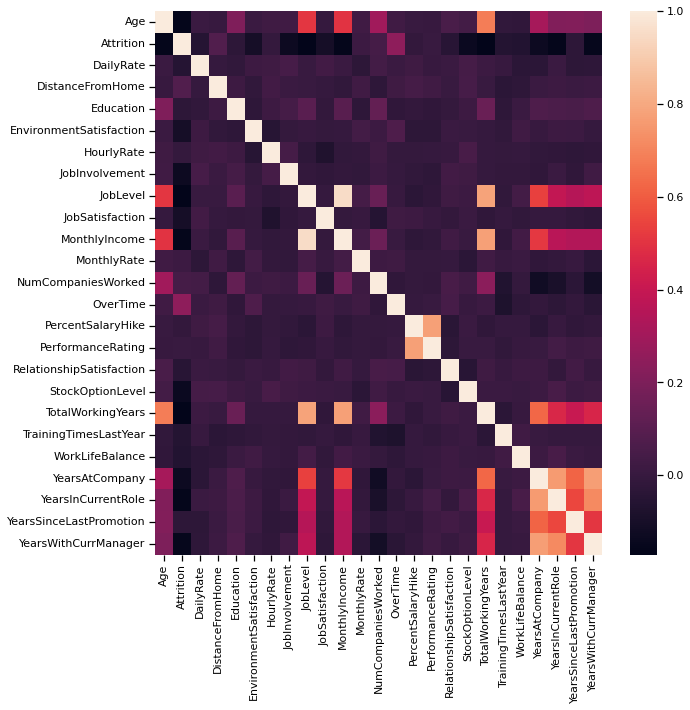

In [84]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot=False)

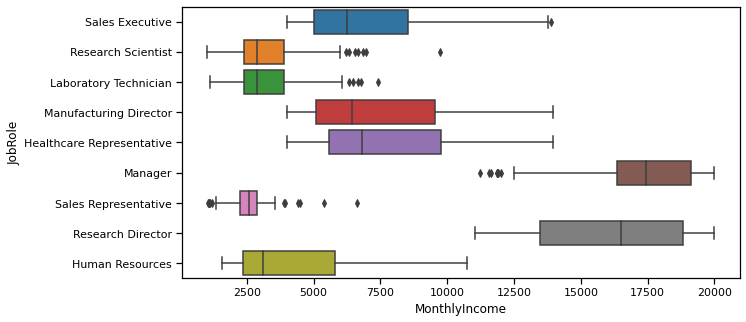

In [85]:
# Otros tipos de gráficos que podemos hacer
plt.figure(figsize=(10, 5))
sns.boxplot(x='MonthlyIncome',y='JobRole',data=employee_df );

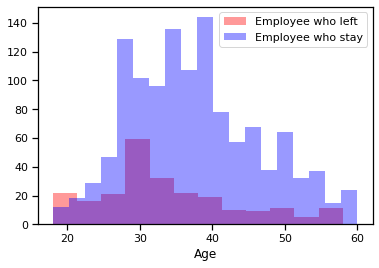

In [141]:
#Adicionalmente, cuando las variables son continuas, lo mejor es revisar sus histogramas
#y comparar la variable en observación
sns.distplot(employee_df[employee_df['Attrition']==1]['Age'],label='Employee who left',color='r',kde=False)
sns.distplot(employee_df[employee_df['Attrition']==0]['Age'],label='Employee who stay',color='b',kde=False)
plt.legend();

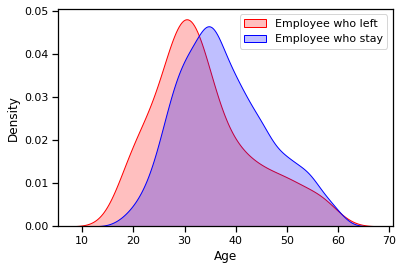

In [146]:
#como es acotado el porcentaje de personas que salen de la compañía (+/- 16%).
#lo mejor es comparar los gráficos KDE (kernel density estimation)...quieres saber más
#https://en.wikipedia.org/wiki/Kernel_density_estimation

sns.kdeplot(employee_df[employee_df['Attrition']==1]['Age'],shade=True,label='Employee who left',color='r')
sns.kdeplot(employee_df[employee_df['Attrition']==0]['Age'],shade=True,label='Employee who stay',color='b')
plt.legend();

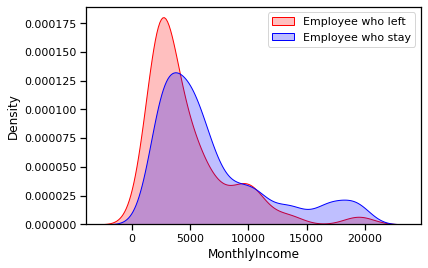

In [145]:
sns.kdeplot(employee_df[employee_df['Attrition']==1]['MonthlyIncome'],shade=True,label='Employee who left',color='r')
sns.kdeplot(employee_df[employee_df['Attrition']==0]['MonthlyIncome'],shade=True,label='Employee who stay',color='b')
plt.legend();

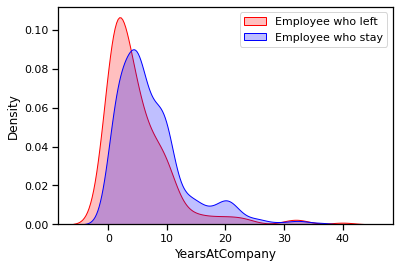

In [144]:
sns.kdeplot(employee_df[employee_df['Attrition']==1]['YearsAtCompany'],shade=True,label='Employee who left',color='r')
sns.kdeplot(employee_df[employee_df['Attrition']==0]['YearsAtCompany'],shade=True,label='Employee who stay',color='b')
plt.legend();

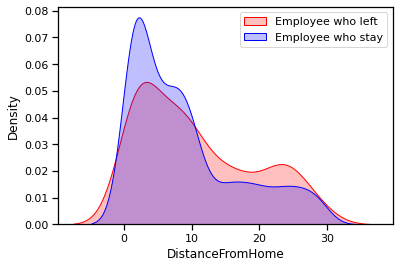

In [143]:
sns.kdeplot(employee_df[employee_df['Attrition']==1]['DistanceFromHome'],shade=True,label='Employee who left',color='r')
sns.kdeplot(employee_df[employee_df['Attrition']==0]['DistanceFromHome'],shade=True,label='Employee who stay',color='b')
plt.legend();

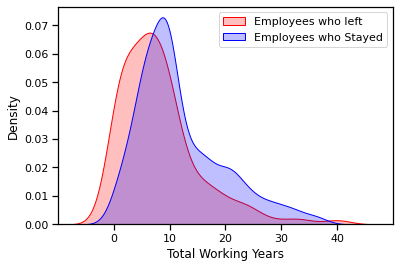

In [142]:
sns.kdeplot(employee_df[employee_df['Attrition']==1]['TotalWorkingYears'], label = 'Employees who left', shade = True, color = 'r')
sns.kdeplot(employee_df[employee_df['Attrition']==0]['TotalWorkingYears'], label = 'Employees who Stayed', shade = True, color = 'b')

plt.xlabel('Total Working Years');
plt.legend();

## Hasta este punto entendimos algo más los datos y su relación con las salidas voluntarias
Ahora debemos decidir que queremos modelar...algunas opciones son generar modelos de clasificadores --> dado un set de características algo que nos diga si una persona se va o se queda: regresión logistica, KNN, SVM, random forest, entre otros. Cada uno con sus pros y cons...a continuación revisaremos 2 posibles soluciones y su implementación


# Data cleaning y formatos

revisemos los datos y algunos trucos para entender la estructura de estos

In [92]:
employee_df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0


In [93]:
x_cat=employee_df[['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus']]
x_cat

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


In [94]:
#función para ver categorias de una variables categórica
np.unique(employee_df['Department'])

array(['Human Resources', 'Research & Development', 'Sales'], dtype=object)

### Un método importante para poder implementar un modelo de AI es poder separar cada atributo de cada variable categórica en vectores de 0s y 1s --> este método es get dummies

In [95]:
X_all=pd.get_dummies(employee_df,columns=['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus'])
X_all=X_all.drop('Attrition', axis=1)
X_all.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1102,1,2,2,94,3,2,4,5993,...,0,0,0,0,0,1,0,0,0,1
1,49,279,8,1,3,61,2,2,2,5130,...,0,0,0,0,1,0,0,0,1,0
2,37,1373,2,2,4,92,2,1,3,2090,...,1,0,0,0,0,0,0,0,0,1
3,33,1392,3,4,4,56,3,1,3,2909,...,0,0,0,0,1,0,0,0,1,0
4,27,591,2,1,1,40,3,1,2,3468,...,1,0,0,0,0,0,0,0,1,0


### él último paso para poder preparar los datos, es importante normalizar la información, esto permite asegurar que todos los datos tengan la misma norma (desde 0 a 1)

In [96]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_all)
X

array([[0.54761905, 0.71581961, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.73809524, 0.12670007, 0.25      , ..., 0.        , 1.        ,
        0.        ],
       [0.45238095, 0.90980673, 0.03571429, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.21428571, 0.03793844, 0.10714286, ..., 0.        , 1.        ,
        0.        ],
       [0.73809524, 0.65926986, 0.03571429, ..., 0.        , 1.        ,
        0.        ],
       [0.38095238, 0.37652112, 0.25      , ..., 0.        , 1.        ,
        0.        ]])

In [97]:
y = employee_df['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32

In [98]:
X.shape

(1470, 50)

In [99]:
y.shape

(1470,)

# Separar el dataset entre el entrenamiento y testeo

In [104]:
#que es el metodo SMOTE??? en cuando tenemos modelos inbalanceados!!


from sklearn.model_selection import train_test_split
#from sklearn.metrics.pairwise import euclidean_distances
from imblearn.over_sampling import SMOTE

sampled,target = SMOTE().fit_resample(X,y)
X_train,X_test,y_train,y_test = train_test_split(sampled,target,test_size=0.3,shuffle=True) 

In [105]:
X_train.shape

(1726, 50)

In [106]:
X_test.shape

(740, 50)

# Implementar regresión logistica

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model=LogisticRegression()
model.fit(X_train, y_train)

y_pred=model.predict(X_test)

In [108]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,

In [109]:
from sklearn.metrics import confusion_matrix, classification_report,plot_confusion_matrix
print("Accuracy entrenamiento {:.2f} %".format( 100 * accuracy_score(model.predict(X_train), y_train)))
print("Accuracy test {:.2f} %".format( 100 * accuracy_score(y_pred, y_test)))


Accuracy entrenamiento 80.71 %
Accuracy test 80.68 %


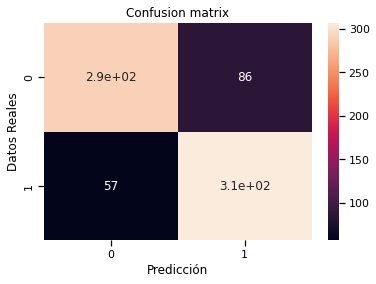

In [110]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True)
plt.xlabel('Predicción')
plt.ylabel('Datos Reales')
plt.title('Confusion matrix')
plt.show()

In [111]:
cm

array([[290,  86],
       [ 57, 307]], dtype=int64)

In [112]:
#Algunos resultados relevantes de la matriz de confusión!
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.77      0.84      0.80       347
           1       0.84      0.78      0.81       393

    accuracy                           0.81       740
   macro avg       0.81      0.81      0.81       740
weighted avg       0.81      0.81      0.81       740



In [113]:
#cual es el valor de los coeficientes
result = pd.DataFrame(model.coef_,columns=X_all.columns)
print(result.T)

                                          0
Age                               -0.809140
DailyRate                         -0.552643
DistanceFromHome                   0.952310
Education                         -0.049023
EnvironmentSatisfaction           -1.156788
HourlyRate                        -0.140357
JobInvolvement                    -1.459515
JobLevel                           0.319301
JobSatisfaction                   -1.168032
MonthlyIncome                     -0.320695
MonthlyRate                        0.279998
NumCompaniesWorked                 1.350206
OverTime                           1.936422
PercentSalaryHike                 -0.842407
PerformanceRating                  0.258533
RelationshipSatisfaction          -0.540609
StockOptionLevel                  -0.468179
TotalWorkingYears                 -1.631941
TrainingTimesLastYear             -1.327250
WorkLifeBalance                   -1.092274
YearsAtCompany                     1.620414
YearsInCurrentRole              

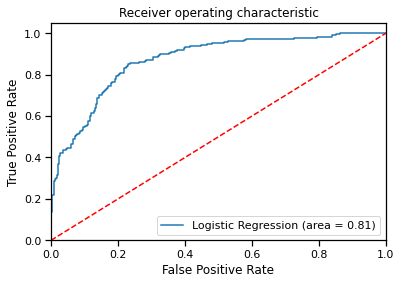

In [114]:
#Curva ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Implementar random forest

In [115]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

y_pred2=random_forest.predict(X_test)

In [116]:
y_pred2

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,

In [117]:
print("Accuracy entrenamiento {:.2f} %".format( 100 * accuracy_score(random_forest.predict(X_train), y_train)))
print("Accuracy test {:.2f} %".format( 100 * accuracy_score(y_pred2, y_test)))

Accuracy entrenamiento 100.00 %
Accuracy test 93.51 %


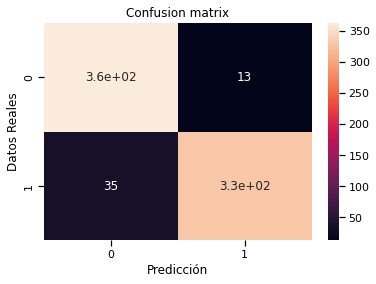

In [118]:
cm = confusion_matrix(y_test, y_pred2)

sns.heatmap(cm, annot=True)
plt.xlabel('Predicción')
plt.ylabel('Datos Reales')
plt.title('Confusion matrix')
plt.show()

In [119]:
cm

array([[363,  13],
       [ 35, 329]], dtype=int64)

In [120]:
#Algunos resultados relevantes de la matriz de confusión!
print(classification_report(y_pred2, y_test))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       398
           1       0.90      0.96      0.93       342

    accuracy                           0.94       740
   macro avg       0.93      0.94      0.93       740
weighted avg       0.94      0.94      0.94       740



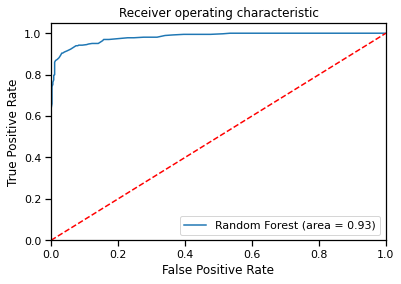

In [121]:
#Curva ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, random_forest.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, random_forest.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Hasta acá logramos armar un modelo de IA, el cual predice los empleados que renuncian...sin embargo quedan varias preguntas, les dejo algunas:

1.-están bien las variables usadas?? o deberíamos sacar algunas??...hay algún método para hacer esto??...un preview: ridge, lasso y elastic net

2.-que otros modelos podemos usar para llegar a un modelo similar???...acá un preview: SVM, KNN, decision trees

En próximos archivos veremos algunos de estos puntos 